# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 11

**See PrairieLearn for _due date_ and _submission_**

## Submission instructions <a name="si"></a>
<hr>

_points: 4_

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4.
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024s/blob/main/docs/homework_instructions.md).

## Imports

In [1]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours". Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

_points: 3_

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

The dataset provides information about whether past payments were made on time and the size of bill statements in the past, as well as some demographic information.There are some columns (for example in Education) that contain unknown values that must be dealt with to make a useful model. We are asked to predict whether they will default next month's payment based on these factors.

<!-- END QUESTION -->

<br><br>

In [2]:
credit_df = pd.read_csv("data/UCI_Credit_Card.csv")

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

_points: 2_

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=76`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [3]:
credit_df = credit_df.drop(columns=["ID"])
train_df, test_df = train_test_split(credit_df, test_size=0.3, random_state=76)
X_train = train_df.drop(columns=["default.payment.next.month"])
y_train = train_df["default.payment.next.month"]
X_test = test_df.drop(columns=["default.payment.next.month"])
y_test = test_df["default.payment.next.month"]

display(X_train)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
8958,340000.0,1,1,2,44,0,0,0,0,0,...,73950.0,59324.0,156094.0,110234.0,20000.0,5000.0,2000.0,112000.0,4234.0,4000.0
22752,200000.0,2,2,2,34,0,0,0,-1,-1,...,3455.0,1078.0,1598.0,171700.0,5504.0,1526.0,1078.0,1598.0,173026.0,6000.0
25882,80000.0,2,2,1,26,0,0,0,0,0,...,74349.0,75443.0,57735.0,58139.0,2800.0,2800.0,2400.0,2100.0,2100.0,2100.0
12925,80000.0,2,2,1,45,0,0,0,0,0,...,80966.0,79295.0,81142.0,80672.0,3130.0,3107.0,2847.0,3134.0,3072.0,3010.0
23598,80000.0,2,2,1,40,-1,-1,-1,-1,-1,...,32194.0,1729.0,590.0,9628.0,2035.0,32194.0,1729.0,590.0,9628.0,16059.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22810,150000.0,2,3,1,42,-1,-1,-1,-1,-1,...,6152.0,7306.0,18726.0,13839.0,6151.0,6427.0,7306.0,18738.0,0.0,7154.0
6528,90000.0,2,5,2,23,0,0,0,0,0,...,42197.0,42726.0,43802.0,42761.0,2000.0,2000.0,1502.0,1737.0,1500.0,5050.0
9607,80000.0,2,1,1,35,-1,2,-1,-1,-1,...,3723.0,303.0,662.0,3295.0,0.0,3723.0,891.0,662.0,3295.0,1088.0
12279,80000.0,2,2,1,27,-1,-1,-1,-1,-1,...,680.0,2862.0,5539.0,0.0,0.0,680.0,2862.0,5539.0,0.0,5775.0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>

_points: 10_

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,167563.508571,1.604381,1.843905,1.554667,35.412952,-0.012190,-0.132714,-0.168333,-0.223143,-0.265762,...,4.684151e+04,43039.813952,40121.889810,38623.497095,5601.265286,6.059441e+03,5204.302571,4889.281333,4782.900857,5162.918714
std,129919.112502,0.488995,0.789845,0.521970,9.136302,1.121864,1.196554,1.195375,1.165490,1.134210,...,6.939829e+04,63817.414980,60400.798292,59055.005208,16239.423781,2.407470e+04,16865.645456,16486.840852,15431.523094,17170.608569
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.632750e+03,2300.000000,1800.000000,1266.250000,1000.000000,8.200000e+02,390.000000,291.000000,257.750000,150.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.999400e+04,18990.000000,18091.000000,17127.000000,2112.500000,2.009000e+03,1801.500000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.028625e+04,54740.000000,50065.250000,48950.500000,5012.000000,5.000000e+03,4531.250000,4048.500000,4078.000000,4001.000000
max,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,706864.000000,823540.000000,568638.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.000000


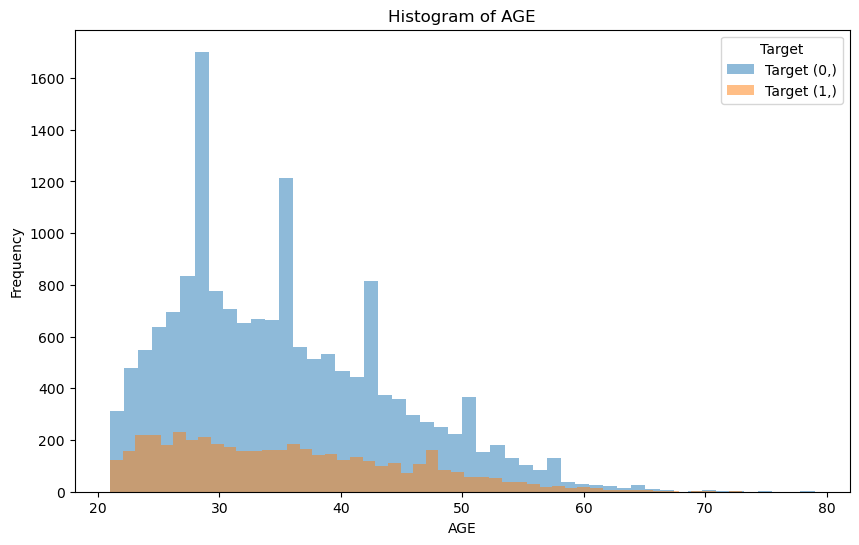

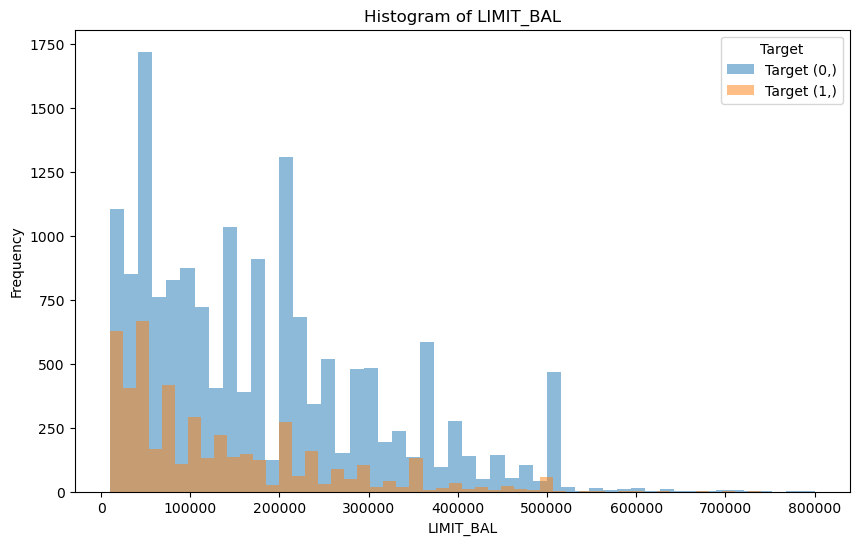

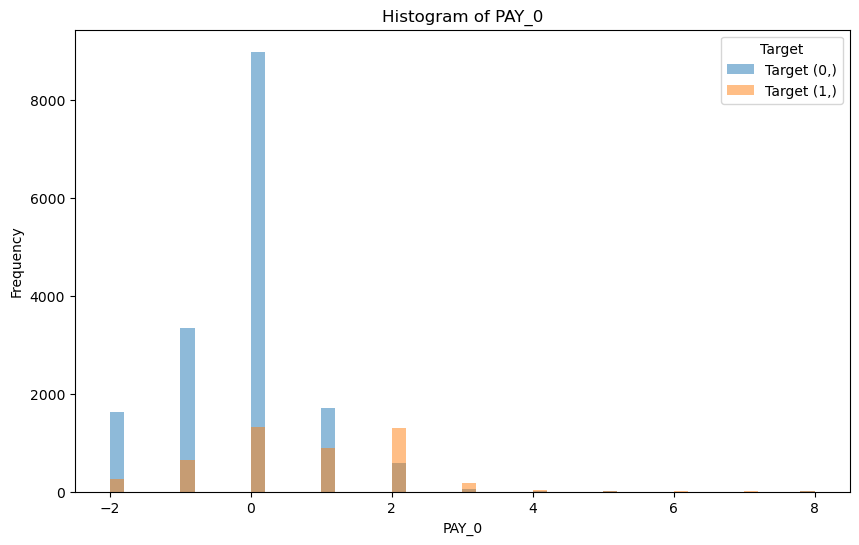

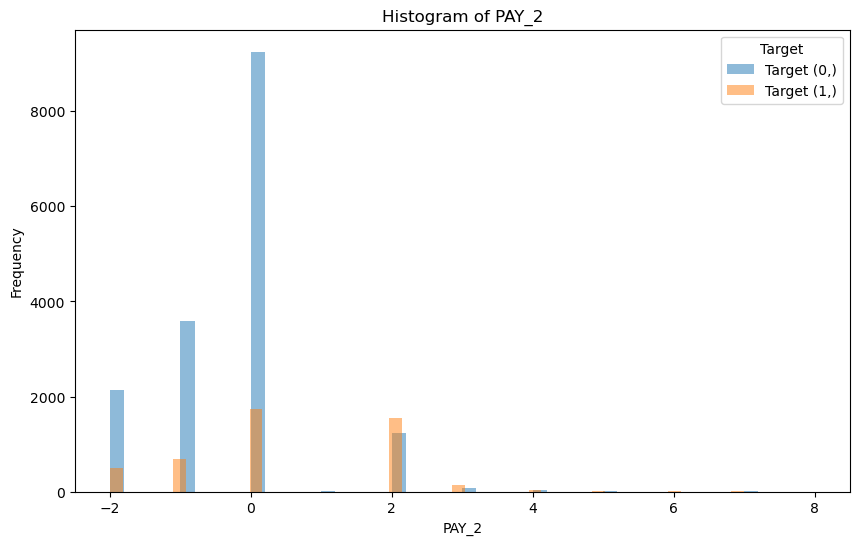

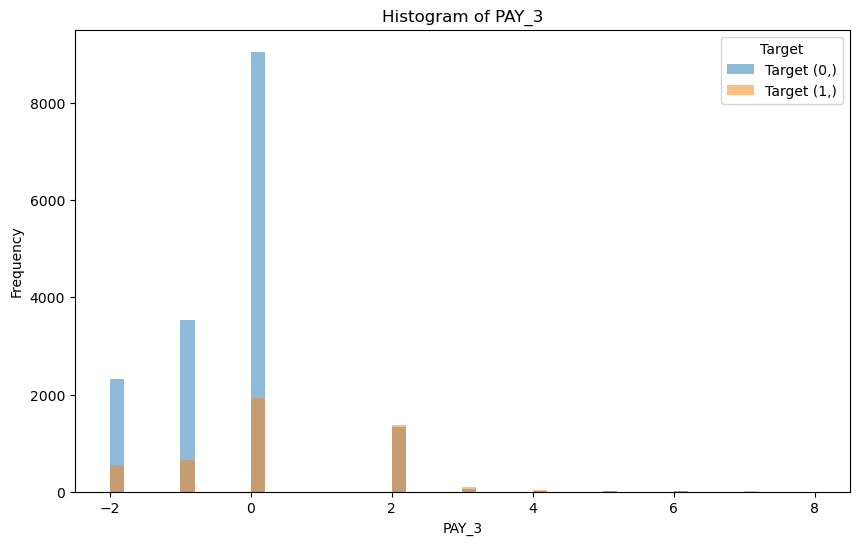

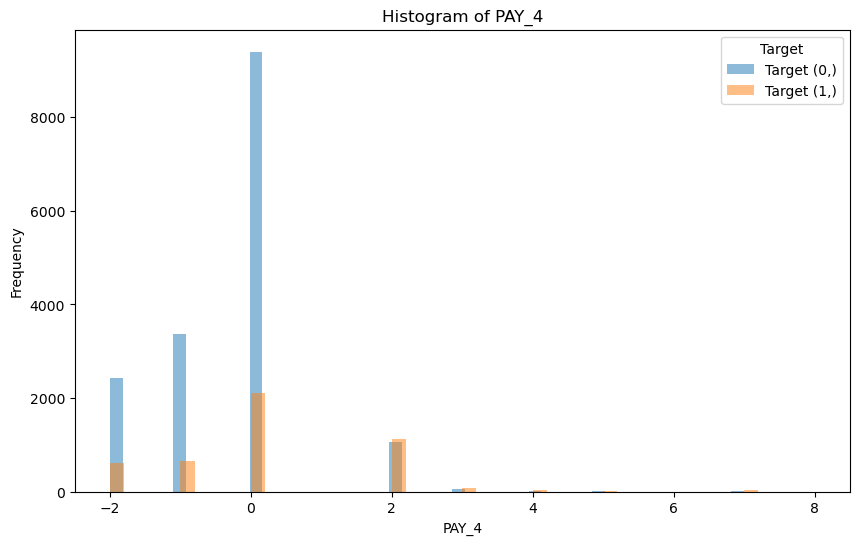

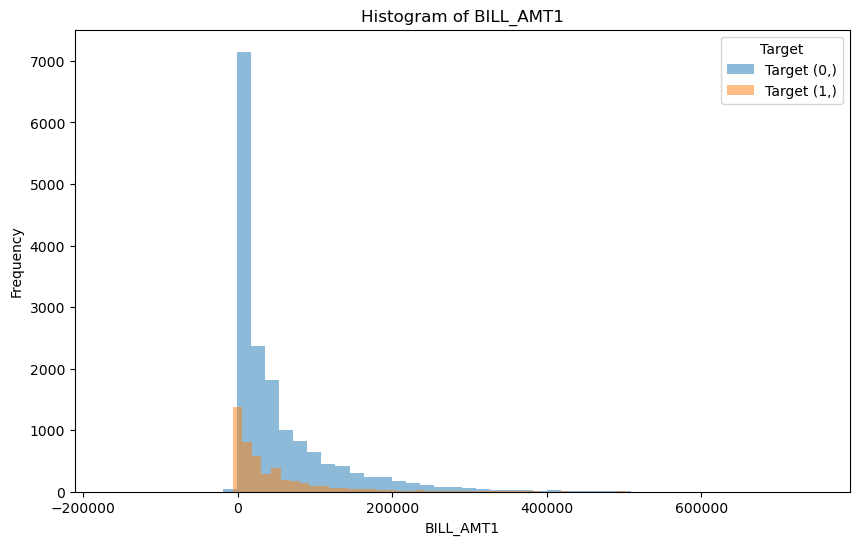

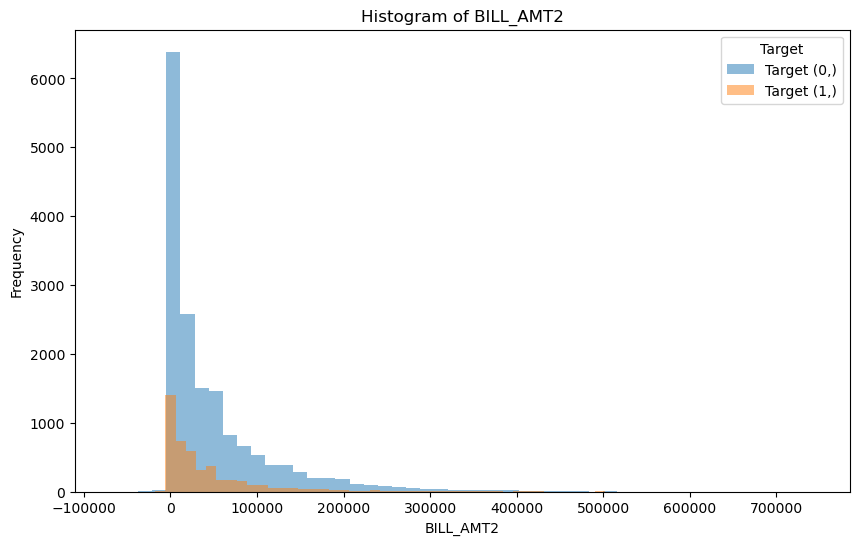

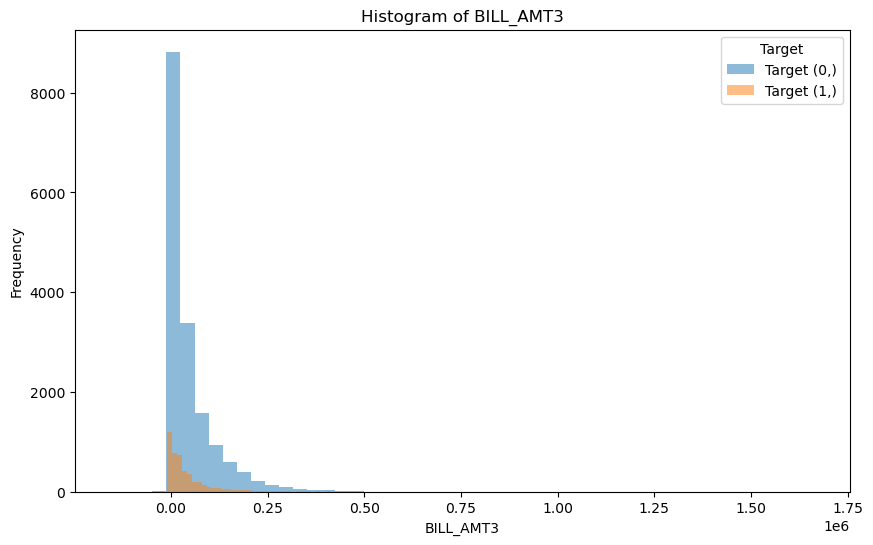

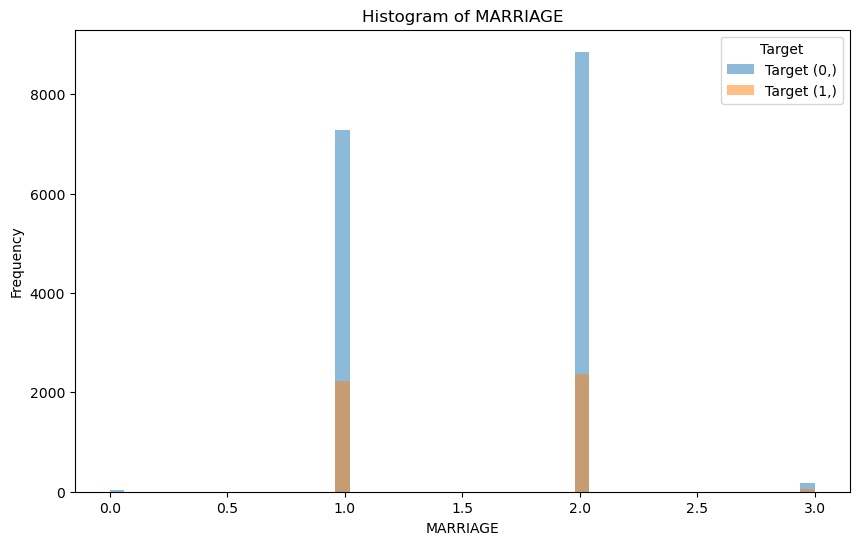

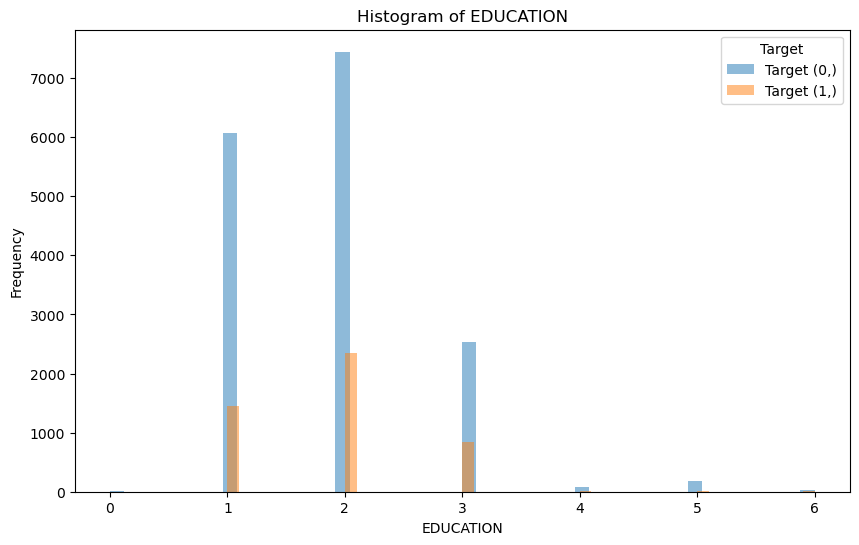

In [4]:
display(X_train.describe())

numeric_cols = ["AGE", "LIMIT_BAL", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "MARRIAGE", "EDUCATION"]

for feat in numeric_cols:
    plt.figure(figsize=(10, 6))
    for target_value, group in train_df.groupby(by=["default.payment.next.month"]):
        group[feat].plot.hist(bins=50, alpha=0.5, label=f'Target {target_value}')
    plt.xlabel(feat)
    plt.ylabel('Frequency')
    plt.title("Histogram of " + feat)
    plt.legend(title='Target')
    plt.show()

2. The mean and standard deviation of each column are of note. They both range greatly between columns, which demonstrates a need for scaling to ensure that features of equal importance are treated equally.
    The mean for limit_bal, and each of the bill_amt columns are quite high, while it is very low for sex, education, marriage, and the pay columns.
    The standard deviations follow a similar trend, columns with higher means seems to understandably have higher standard deviations.

4. There is a significant class imbalance, there is less of target 1(defaulting) then target 0. It is more costly to approve a client who will default, than to decline a client who won't. As such, it is more important to  correctly identify clients who will default than to minimize the number who are rejected and will not default. 

This leads us to believe that the appropriate metric for assesment is recall, as recall scores prioritizee minimizing false negatives over minimizing false positives.


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Preprocessing and transformations <a name="5"></a>
<hr>

_points: 10_

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

1. Education, marriage, and each of the pay columns are categorical. Sex is a binary feature. Limit_BAL, Age, each of the bill amount columns, and each of the pay_amnt columns are purely numerical. I would pass through the  pay column, because it is ordinal and has already has been assigned a natural order. I would also pass through sex, because it already has binary numerical values that don't require scaling. Then, I would apply OneHotEncoder on education and marriage (passing the dropifbinary argument), StandardScaler to each of the numeric features except the bill amount columns which I would drop as it is not useful (see answer 3.3).

In [6]:
passthrough_cols = ["SEX", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
scale_cols = ["AGE", "LIMIT_BAL", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
drop_cols = ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
ohe_cols = ["EDUCATION", "MARRIAGE"]
ct = make_column_transformer(
    (StandardScaler(), scale_cols),  # scaling on numeric features
    ("passthrough", passthrough_cols),  # let these features passthrough - nothing to be done
    (OneHotEncoder(drop="if_binary"), ohe_cols),  # OHE on categorical features
    ("drop", drop_cols),  # drop the drop features 
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Baseline model <a name="6"></a>
<hr>

_points: 2_

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [7]:
baseline_dummy = DummyClassifier(strategy="most_frequent")
baseline_dummy = cross_validate(baseline_dummy, X_train, y_train, cv=5, return_train_score=True)
baseline_dummy = pd.DataFrame(baseline_dummy)
display(baseline_dummy)

,fit_time,score_time,test_score,train_score
0,0.010502,0.003990,0.778095,0.778155
1,0.004983,0.001009,0.778095,0.778155
2,0.006963,0.000997,0.778095,0.778155
3,0.004514,0.000997,0.778095,0.778155
4,0.009586,0.002998,0.778333,0.778095


<br><br>

<!-- BEGIN QUESTION -->

## 6. Linear models <a name="7"></a>
<hr>

_points 10_

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [9]:
# Adapted from Lecture 7

scores_dict = {
    # list of different C values to try
    "C": 10.0 ** np.arange(-4, 6, 1),
    "mean_train_scores": list(),
    "std_train_scores": list(),
    "mean_cv_scores": list(),
    "std_cv_scores": list(),
}

for C in scores_dict["C"]:
    # ct  we created above, and optimizing the C hyperparameter
    pipe_ridge = make_pipeline(ct, LogisticRegression(C=C))
    scores = cross_validate(pipe_ridge, X_train, y_train, return_train_score=True)
    scores_dict["mean_train_scores"].append(scores["train_score"].mean()) # appending our mean and std scores to the results
    scores_dict["std_train_scores"].append(scores["train_score"].std())
    scores_dict["mean_cv_scores"].append(scores["test_score"].mean())
    scores_dict["std_cv_scores"].append(scores["test_score"].std())
  
results_df = pd.DataFrame(scores_dict)

results_df.set_index("C", inplace=True)

display(results_df)

,mean_train_scores,std_train_scores,mean_cv_scores,std_cv_scores
C,,,,
0.0001,0.780429,0.000335,0.780476,0.001506
0.0010,0.799690,0.001411,0.799714,0.005983
0.0100,0.808702,0.001535,0.808524,0.005407
0.1000,0.809762,0.001411,0.809286,0.004863
1.0000,0.810083,0.001377,0.809619,0.004980
10.0000,0.810000,0.001458,0.809571,0.004705
100.0000,0.810083,0.001470,0.809571,0.004676
1000.0000,0.810060,0.001477,0.809476,0.004674
10000.0000,0.810095,0.001464,0.809667,0.004672


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Different models <a name="8"></a>
<hr>

_points: 12_

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_7
    
</div>

In [31]:
# Util from utils.py used in lectures

def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)


import warnings

warnings.simplefilter(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

# Adapted from Lecture 11
from lightgbm.sklearn import LGBMClassifier
scoring_metric = "precision"

pipe_lr = make_pipeline(ct, LogisticRegression(C=C))

pipe_kNN = make_pipeline(
    ct, KNeighborsClassifier()
)

pipe_rf = make_pipeline(
    ct, RandomForestClassifier(class_weight="balanced", random_state=123)
)

pipe_lgbm = make_pipeline(
    ct, LGBMClassifier(random_state=123, verbose=-1)
)

classifiers = {
    "Logictic Regression": pipe_lr,
    "random forest": pipe_rf,
    "LightGBM": pipe_lgbm,
    "kNN": pipe_kNN,
}

results = {}

dummy = DummyClassifier()
results["Dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

for (name, model) in classifiers.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True, scoring=scoring_metric
    )

pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.005 (+/- 0.001),0.006 (+/- 0.002),0.000 (+/- 0.000),0.000 (+/- 0.000)
Logictic Regression,0.190 (+/- 0.040),0.020 (+/- 0.004),0.714 (+/- 0.031),0.718 (+/- 0.009)
random forest,5.240 (+/- 0.751),0.127 (+/- 0.012),0.654 (+/- 0.011),0.998 (+/- 0.001)
LightGBM,0.450 (+/- 0.054),0.028 (+/- 0.003),0.664 (+/- 0.012),0.788 (+/- 0.009)
kNN,0.043 (+/- 0.011),0.337 (+/- 0.057),0.562 (+/- 0.012),0.725 (+/- 0.004)


In [ ]:
All three models are all overfitting, but LightGBM is overfitting the least. The gap between its scores for accuracy are the smallest. It is also the best performing model, while kNN performed very poorly on the validation data. Random forest had the highest fit time, and kNN had the higest score time.
Our best model LightGBM, only outperformed our LogisticRegression Model by a slim margin. It is also noted that our LogisticRegression Model in terms of precision outperformed all the other models we tested.

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Hyperparameter optimization <a name="10"></a>
<hr>

_points: 10_

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

In [52]:
#Adapted from lecture 8
#random forest
rf_param_grid = {"randomforestclassifier__max_depth": [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

gs = GridSearchCV(pipe_rf, param_grid = rf_param_grid, n_jobs=-1, return_train_score=True)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

#light gbm
lgbm_param_grid = {"lgbmclassifier__max_depth": [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
lgs = GridSearchCV(pipe_lgbm, param_grid = lgbm_param_grid, n_jobs=-1, return_train_score=True)
lgs.fit(X_train, y_train)
print(lgs.best_score_)
print(lgs.best_params_)


knn_param_grid = {"kneighborsclassifier__n_neighbors": [1, 2, 4, 6, 8, 10, 20, 30]}
kgs =  GridSearchCV(pipe_kNN, param_grid = knn_param_grid, n_jobs=-1, return_train_score=True)
kgs.fit(X_train, y_train)
print(kgs.best_score_)
print(kgs.best_params_)

# {'randomforestclassifier__n_estimators': 45, 'randomforestclassifier__max_depth': 7} 0.8196666666666665
# {'lgbmclassifier__num_leaves': 7, 'lgbmclassifier__max_depth': 21, 'lgbmclassifier__learning_rate': 0.01} 0.8189047619047619
#{'kneighborsclassifier__n_neighbors': 47} 0.8151428571428572
# rf_param_grid = {
#     "randomforestclassifier__max_depth": np.arange(2, 100, 5),
#     "randomforestclassifier__n_estimators": np.arange(5, 100, 5),
# }

# light_param_grid = {
#     "lgbmclassifier__num_leaves": np.arange(2, 100, 5),
#     "lgbmclassifier__max_depth": np.arange(1, 100, 5),
#     "lgbmclassifier__learning_rate": np.logspace(-4, 6, num=11)
# }

# knn_param_grid = {
#     "kneighborsclassifier__n_neighbors": np.arange(2, 50, 5),
# }

# rf_random_cv = RandomizedSearchCV(rf_pipe, rf_param_grid, n_iter=25, n_jobs=-1)
# light_random_cv = RandomizedSearchCV(light_pipe, light_param_grid, n_iter=25, n_jobs=-1)
# knn_random_cv = RandomizedSearchCV(knn_pipe, knn_param_grid, n_iter=25, n_jobs=-1)

# rf_random_cv.fit(X_train, y_train)
# light_random_cv.fit(X_train, y_train)
# knn_random_cv.fit(X_train, y_train)

                                          

0.8155714285714286
0.8183809523809524
{'lgbmclassifier__max_depth': 20}
0.8141428571428572
{'kneighborsclassifier__n_neighbors': 30}


<div class="alert alert-warning">
    
Solution_8
    
</div>

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Results on the test set <a name="12"></a>
<hr>

_points: 10_

**Your tasks:**

1. Try your best performing model on the test data: report and explain test scores.
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias?

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Summary of results <a name="13"></a>
<hr>

_points 12_

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table (printed `DataFrame`) summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using PrairieLearn.
4. Make sure that the plots and output are rendered properly in your submitted file.

This was a tricky one but you did it!